In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

In [2]:
tf.random.set_seed(42)

In [3]:
hand = mnist.load_data()

In [4]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [5]:
(X_train, y_train), (X_test, y_test) = hand

In [6]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

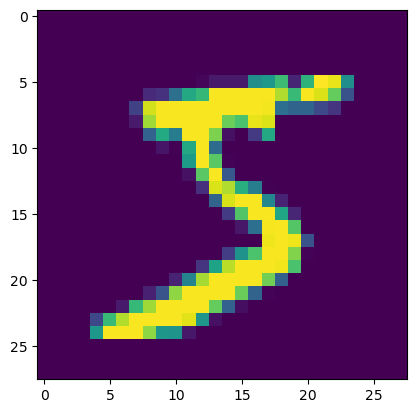

In [10]:
plt.imshow(X_train[0])

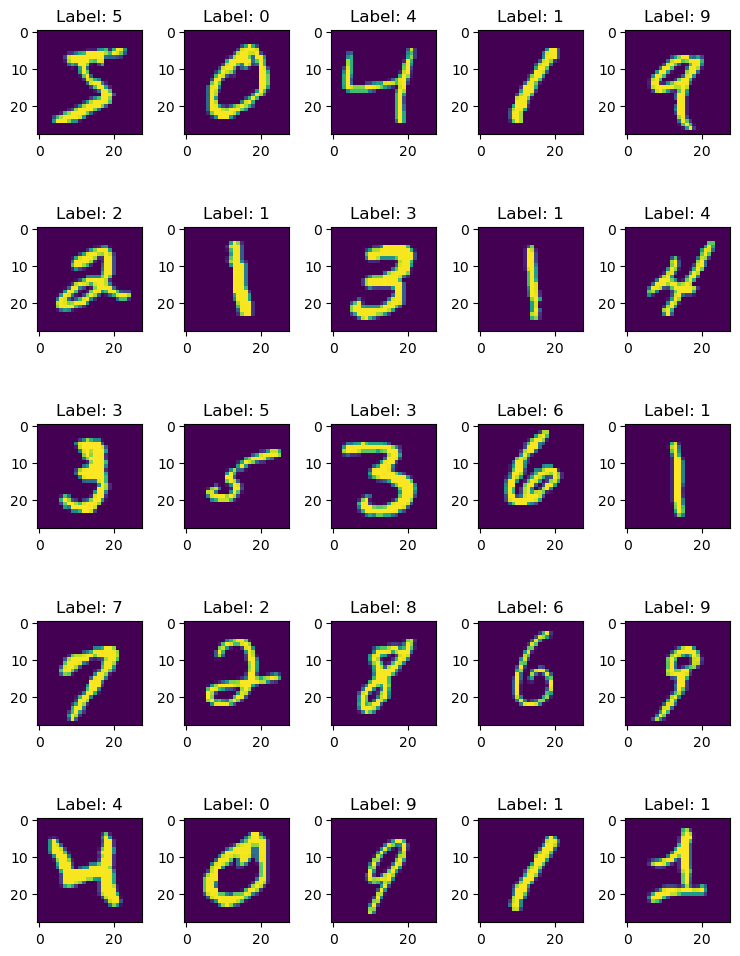

In [11]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [12]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
X_train /= 255
X_test /= 255

In [15]:
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [16]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [18]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 82s 43ms/step - loss: 0.2139 - accuracy: 0.9345
Epoch 2/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0907 - accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0670 - accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0571 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0497 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0432 - accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0392 - accuracy: 0.9873
Epoch 8/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0366 - accuracy: 0.9885
Epoch 9/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0325 - accuracy: 0.9900
Epoch 10/10
1875/1875 [==============================] - 73s 39m

In [20]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 3s - loss: 0.0280 - accuracy: 0.9906 - 3s/epoch - 9ms/step


In [21]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 [==============================] - 0s 159ms/step


array([[6.4765164e-13, 1.9687477e-07, 8.5364945e-08, 8.2137774e-07,
        4.1878518e-09, 1.2646989e-10, 2.0727745e-15, 9.9999869e-01,
        1.2019508e-10, 1.7807879e-07],
       [7.1595581e-12, 5.7185399e-11, 1.0000000e+00, 4.2230477e-12,
        3.7438006e-14, 2.1671338e-18, 3.7002283e-13, 8.8425561e-13,
        1.7198536e-13, 1.9646823e-16],
       [4.7675291e-10, 9.9998176e-01, 1.8888504e-07, 1.4517101e-08,
        5.7116213e-06, 1.9993089e-07, 4.2157126e-06, 7.1990157e-06,
        4.5118114e-07, 9.0149790e-08],
       [9.9999535e-01, 1.1415102e-11, 3.6350991e-09, 8.9491164e-10,
        5.7401393e-11, 5.5480132e-10, 4.6531445e-06, 5.9245738e-12,
        2.3621851e-09, 1.4993850e-08]], dtype=float32)

In [22]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 [==============================] - 0s 34ms/step


array([1.       , 1.       , 0.9999999, 1.       ], dtype=float32)

In [23]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [24]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 [==============================] - 3s 9ms/step
[[ 978    0    1    0    0    0    0    1    0    0]
 [   0 1128    1    1    0    1    3    1    0    0]
 [   1    0 1026    1    0    0    0    3    1    0]
 [   0    0    2 1004    0    3    0    0    1    0]
 [   1    0    1    0  961    0    4    0    3   12]
 [   0    0    0    3    0  887    1    0    1    0]
 [   5    1    0    1    1    4  946    0    0    0]
 [   0    0    7    1    0    0    0 1016    1    3]
 [   1    0    1    1    0    0    0    1  968    2]
 [   3    0    0    2    2    6    0    2    2  992]]


In [26]:
path = r'C:\Users\jinu5\Desktop\careerfoundry\ML'
path

'C:\\Users\\jinu5\\Desktop\\careerfoundry\\ML'

In [324]:
img = Image.open(os.path.join(path, '1.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(100, 100)
P


In [325]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [326]:
testimg = asarray(img2)

In [327]:
print(testimg.shape)

(28, 28)


In [328]:
testimg = testimg.reshape(1, 28, 28, 1)

In [329]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 [==============================] - 0s 36ms/step
1


### Test my handwriting

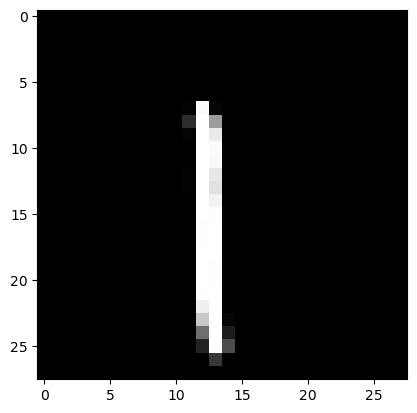

1/1 [==============================] - 0s 31ms/step
1


In [332]:
img = Image.open(os.path.join(path, '1.png')) 
newsize = (28, 28)
img_resized = img.resize(newsize)
plt.imshow(img_resized)
plt.show()
testimg = asarray(img2)
testimg = testimg.reshape(1, 28, 28, 1)
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

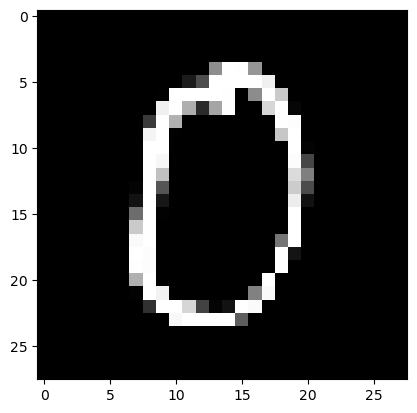

1/1 [==============================] - 0s 38ms/step
0


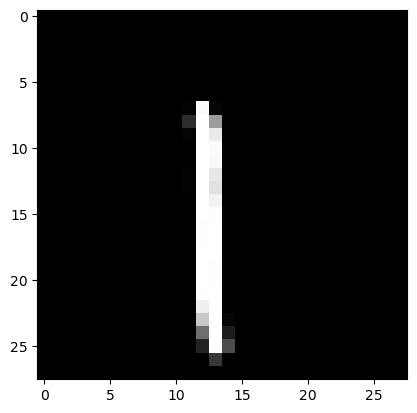

1/1 [==============================] - 0s 20ms/step
1


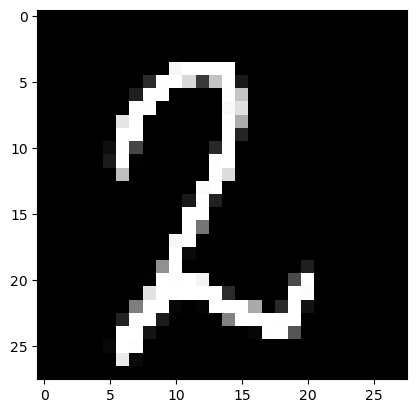

1/1 [==============================] - 0s 21ms/step
2


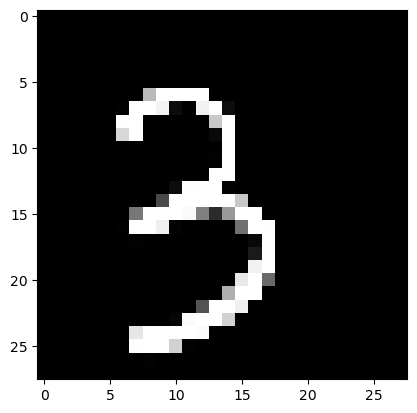

1/1 [==============================] - 0s 27ms/step
3


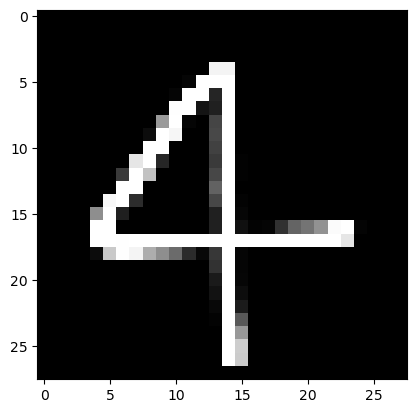

1/1 [==============================] - 0s 30ms/step
4


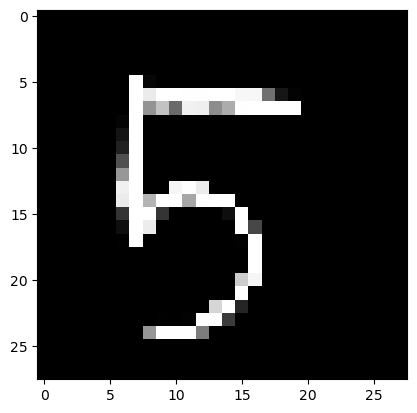

1/1 [==============================] - 0s 24ms/step
5


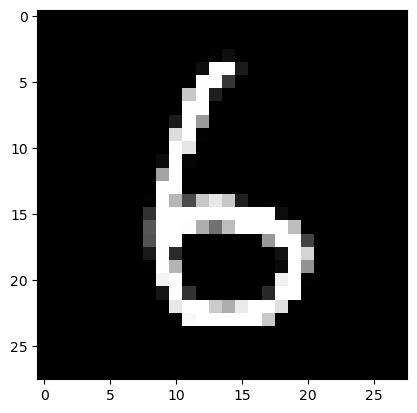

1/1 [==============================] - 0s 21ms/step
6


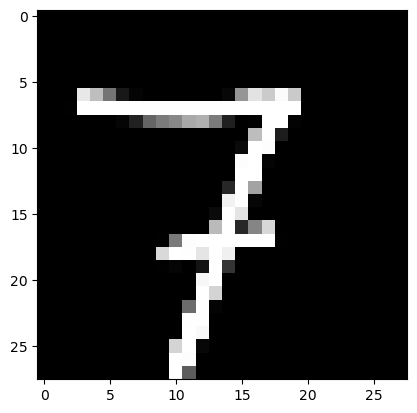

1/1 [==============================] - 0s 22ms/step
7


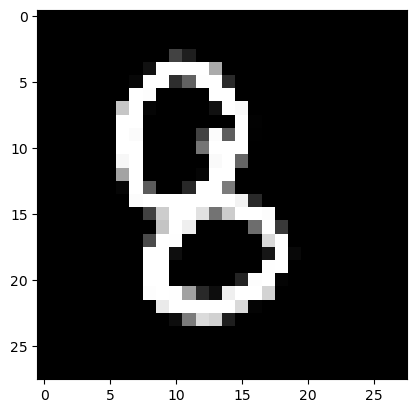

1/1 [==============================] - 0s 22ms/step
8


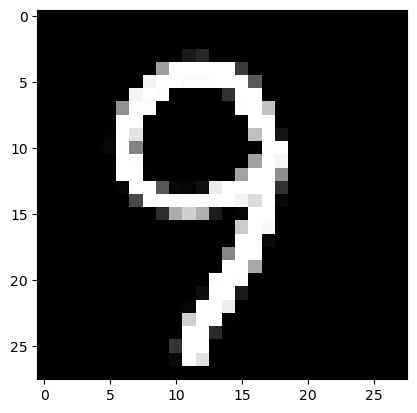

1/1 [==============================] - 0s 22ms/step
9


In [334]:
for i in range(10):
    img = Image.open(os.path.join(path, f'{i}.png')) 
    newsize = (28, 28)
    img_resized = img.resize(newsize)
    plt.imshow(img_resized)
    plt.show()
    testimg = asarray(img_resized)
    testimg = testimg.reshape(1, 28, 28, 1)
    predict_value = model.predict(testimg)
    digit = argmax(predict_value)
    print(digit)

### How many numbers does the model accurately identify? Record in a Google document which number you uploaded and what number the model thought it was. What percent accuracy did it have? If you wrote any letters, what did it think the letter was?

Above, the model recognized 100% of the handwriting, but I was having trouble recognizing the handwriting, so after rewriting and retesting several times, I finally got a set that recognized the whole thing. 
As a result, I could see that it can recognize images, but it needs a lot of training and accurate images. 
If I were to write letters, the recognition rate would be even worse than numbers. 